In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('one_hot_encoding.csv')

## train test split

In [3]:
df_x = df.drop('RainTomorrow', axis=1)
df_y = df['RainTomorrow']
x = df_x.to_numpy()
y = df_y.to_numpy()
x.shape, y.shape

((142193, 111), (142193,))

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((99535, 111), (42658, 111), (99535,), (42658,))

## standartscaler

In [5]:
from sklearn.preprocessing import StandardScaler
rb = StandardScaler()
rb.fit(x_train)
x_train_norm = rb.transform(x_train)
x_valid_norm = rb.transform(x_valid)

## tensorflow

In [6]:
x_train.shape

(99535, 111)

In [7]:
input_shape = x_train_norm.shape[1]

In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(100, activation='relu'),
        layers.Dropout(.5),
        layers.Dense(50, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               11200     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 16,301
Trainable params: 16,301
Non-trainable params: 0
_________________________________________________________________


In [9]:
tf.keras.backend.clear_session()

In [10]:
model.compile(
    loss='binary_crossentropy',
    metrics=tf.keras.metrics.AUC(),
    optimizer=keras.optimizers.Adam(lr=0.001, amsgrad=True)
)

C:\Users\danid\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
history = model.fit(x_train_norm, 
                    y_train, 
                    batch_size=40, 
                    epochs=30, 
                    validation_data=(x_valid_norm, y_valid), 
                    verbose=0)

Text(0.5, 1.0, 'Loss')

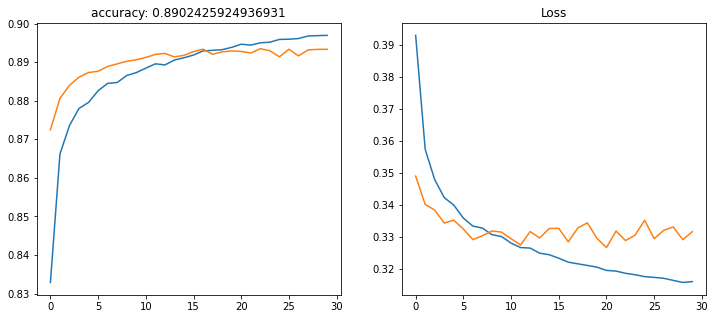

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['auc'])
ax1.plot(history.history['val_auc'])
ax1.set_title(f"accuracy: {np.mean(history.history['val_auc'])}")

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')

In [13]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])